In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
df = pd.read_csv('FIrst & Secondset of features non treated normalized.csv')

In [ ]:
df

,Unnamed: 0,Image,mean(L*),mean(a*),mean(b*),std(L*),std(a*),std(b*),mean(a*)*mean(b*),mean(L*)*mean(a*),mean(L*)*mean(b*),mean(a*)/mean(b*),mean(L*)/mean(a*),mean(L*)/mean(b*),p1,p2,Quality
0,0,2021-08-04 13_11_45.jpg,0.923033,0.019813,0.894987,0.457368,0.969826,0.846909,0.060695,0.916113,0.923730,0.039818,0.927983,0.921884,0.980694,0.019306,Q5
1,1,2021-08-04 15_12_43.jpg,0.953275,0.024162,0.857043,0.451029,0.949068,0.780285,0.004272,0.951060,0.946259,0.056715,0.954652,0.961088,0.996507,0.003493,Q5
2,2,2021-08-04 15_36_42.jpg,0.990423,0.022910,0.883991,0.575748,0.960575,0.824136,0.049303,0.992177,0.985333,0.045749,0.988894,0.996181,0.995226,0.004774,Q5
3,3,2021-08-04 16_01_30.jpg,0.992520,0.020942,0.884909,0.575679,0.961745,0.824388,0.045646,0.993960,0.987448,0.044280,0.991268,0.998267,0.996244,0.003756,Q5
4,4,2021-08-04 18_02_23.jpg,0.954848,0.010926,0.874504,0.433594,0.960137,0.796378,0.000000,0.949143,0.950449,0.042522,0.959102,0.959664,1.000000,0.000000,Q5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,2021-09-03 00_00_01.jpg,0.190925,0.989907,0.040639,0.049559,0.006267,0.026307,0.945512,0.258407,0.156968,0.986857,0.142958,0.233410,0.590037,0.409963,Q1
308,308,2021-09-03 02_00_32.jpg,0.190959,0.986242,0.034127,0.096017,0.000000,0.019290,0.923178,0.257848,0.156398,0.987860,0.143372,0.234250,0.582944,0.417056,Q1
309,309,2021-09-03 04_01_04.jpg,0.191305,0.992062,0.035010,0.086363,0.003727,0.012083,0.939469,0.259238,0.156780,0.991002,0.143039,0.234543,0.584474,0.415526,Q1
310,310,2021-09-03 06_01_36.jpg,0.193119,0.992969,0.020857,0.016823,0.002837,0.000000,0.913033,0.261673,0.157051,0.998663,0.144411,0.238397,0.596149,0.403851,Q1


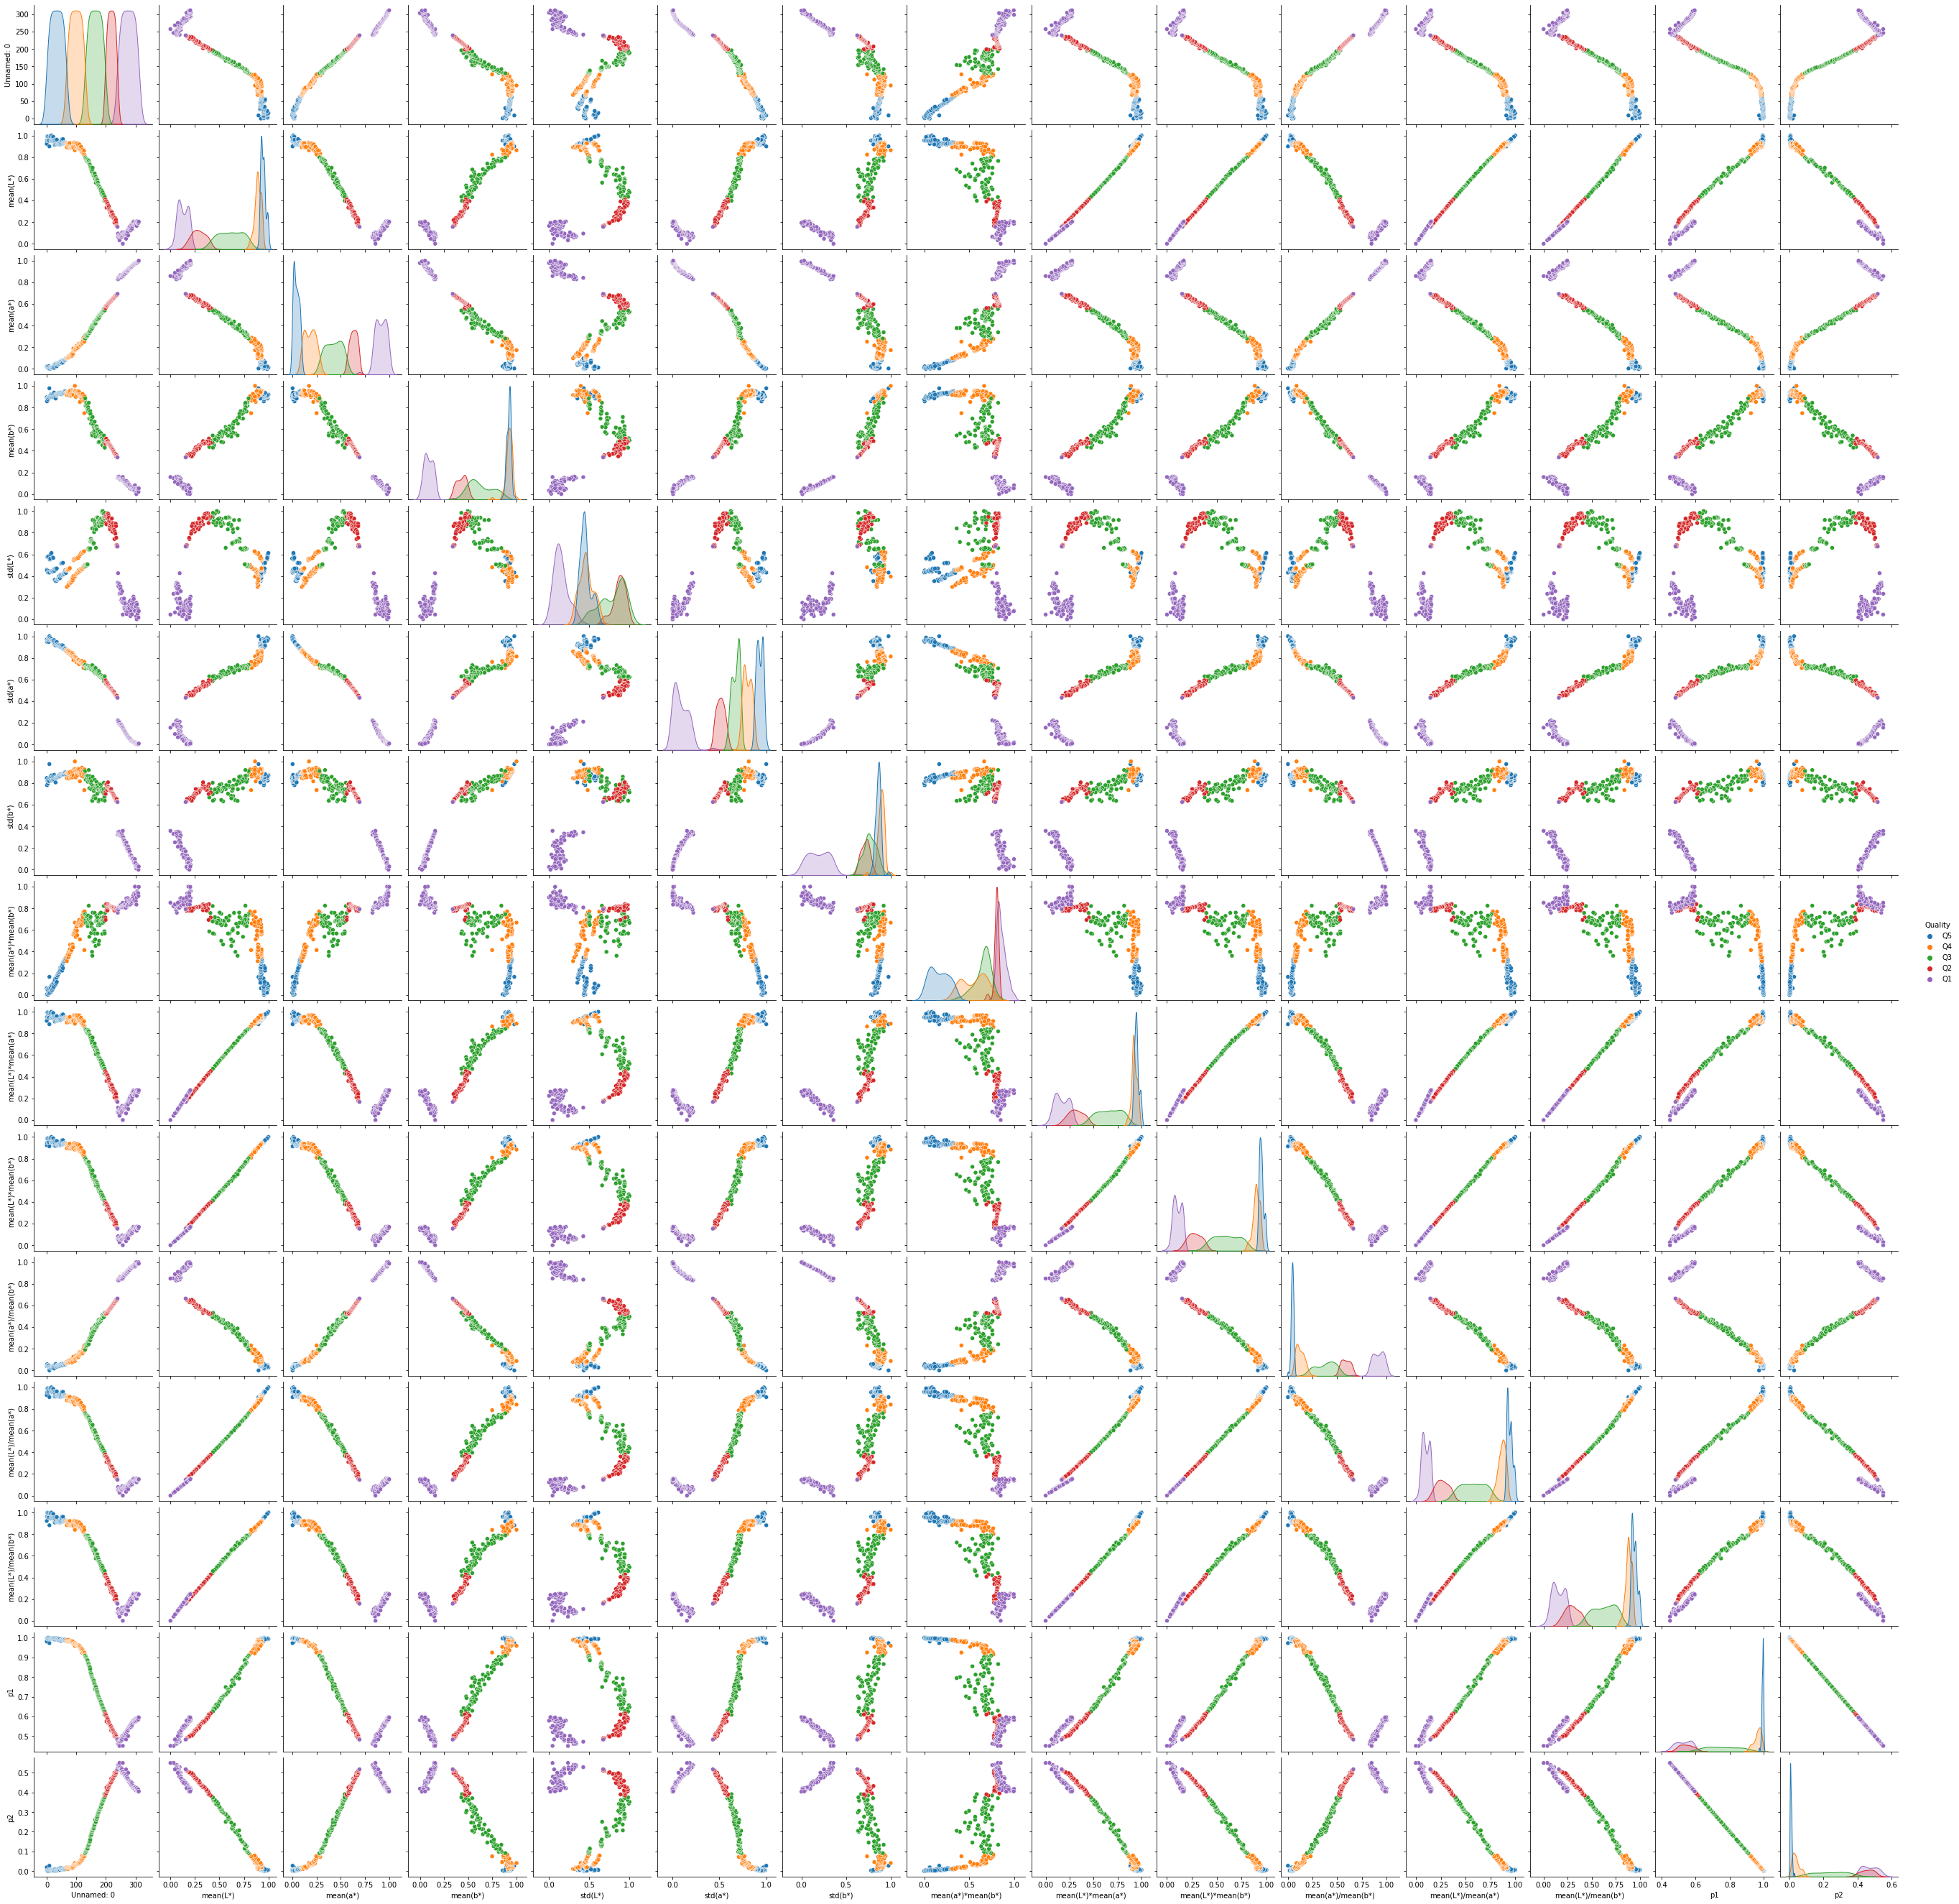

In [ ]:
sns.pairplot(df, hue = 'Quality')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
columns = ['mean(L*)', 'mean(a*)', 'mean(b*)', 'p1']
X = df[columns]
Y = df['Quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state= 5)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test, y_test)

0.9574468085106383

In [ ]:
model.predict(X_test)

array(['Q4', 'Q3', 'Q3', 'Q5', 'Q1', 'Q1', 'Q5', 'Q1', 'Q4', 'Q5', 'Q4',
       'Q2', 'Q2', 'Q1', 'Q5', 'Q3', 'Q1', 'Q5', 'Q1', 'Q1', 'Q1', 'Q3',
       'Q1', 'Q1', 'Q4', 'Q3', 'Q4', 'Q1', 'Q3', 'Q3', 'Q1', 'Q1', 'Q5',
       'Q5', 'Q5', 'Q3', 'Q3', 'Q2', 'Q3', 'Q1', 'Q2', 'Q5', 'Q3', 'Q1',
       'Q5', 'Q3', 'Q1', 'Q1', 'Q1', 'Q5', 'Q5', 'Q4', 'Q4', 'Q3', 'Q3',
       'Q5', 'Q4', 'Q1', 'Q2', 'Q1', 'Q5', 'Q4', 'Q2', 'Q5', 'Q2', 'Q2',
       'Q3', 'Q1', 'Q5', 'Q3', 'Q4', 'Q5', 'Q2', 'Q5', 'Q5', 'Q3', 'Q1',
       'Q4', 'Q5', 'Q5', 'Q3', 'Q5', 'Q2', 'Q5', 'Q1', 'Q2', 'Q4', 'Q3',
       'Q4', 'Q4', 'Q3', 'Q3', 'Q1', 'Q4'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predictions = model.predict(X)
confusion_matrix(Y,predictions)

array([[73,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0],
       [ 0,  2, 66,  0,  0],
       [ 0,  0,  0, 61,  2],
       [ 0,  0,  0,  0, 67]])